In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from minijpas_LF_and_puricomp import effective_volume
from my_functions import double_schechter

In [2]:
%matplotlib inline

In [3]:
# My LF

nbs_list = [[4, 8]]
survey_list = [f'minijpasAEGIS00{i}' for i in range(1, 4 + 1)] + ['jnep']
total_volume = 0
for [this_nb_min, this_nb_max] in nbs_list:
    total_volume += effective_volume(this_nb_min, this_nb_max, 'both')
L_binning = np.load('npy/L_nb_err_binning.npy')
b = np.log10(L_binning)
LF_bins = np.array([(b[i] + b[i + 1]) / 2 for i in range(len(b) - 1)])
bin_width = np.array([b[i + 1] - b[i] for i in range(len(b) - 1)])

qso_factor = 0.3

hist_mat = None
LF_raw = None
for i, [nb1, nb2] in enumerate(nbs_list):
    this_hist = None
    for survey_name in survey_list:
        pathname = f'Luminosity_functions/LF_r17-24_nb{nb1}-{nb2}_ew30_ewoth400_nb_{qso_factor:0.1f}'
        filename_hist = f'{pathname}/hist_i_mat_{survey_name}.npy'
        hist_i_mat = np.load(filename_hist)

        if this_hist is None:
            this_hist = hist_i_mat
        else:
            this_hist += hist_i_mat

    if hist_mat is None:
        hist_mat = this_hist
    else:
        hist_mat = np.vstack([hist_mat, this_hist])

    filename_dict = f'{pathname}/LFs.pkl'
    with open(filename_dict, 'rb') as file:
        if LF_raw is None:
            LF_raw = pickle.load(file)['LF_total_raw']
        else:
            LF_raw += pickle.load(file)['LF_total_raw']

L_LF_err_percentiles = np.percentile(hist_mat, [16, 50, 84], axis=0)
LF_err_plus = L_LF_err_percentiles[2] - L_LF_err_percentiles[1]
LF_err_minus = L_LF_err_percentiles[1] - L_LF_err_percentiles[0]
hist_median = L_LF_err_percentiles[1]

yerr_plus = (hist_median + LF_err_plus **
                    2) ** 0.5 / bin_width / total_volume
yerr_minus = (hist_median + LF_err_minus **
                    2) ** 0.5 / bin_width / total_volume


LF_dict = {
    'LF_bins': LF_bins,
    'LF_total': hist_median / bin_width / total_volume,
    'LF_total_uncorr': LF_raw,
    'LF_total_err': [yerr_minus, yerr_plus]
}

In [4]:
# Load reference LFs
pathname = '/home/alberto/almacen/literature_LF_data'

# Blanc 2011 (z=1.9--3.8)
filename = f'{pathname}/blanc2011_allz.txt'
df = pd.read_table(filename, delimiter='\t')
b11 = {
    'logL': df['LogLya'],
    'Phi': df['phi'],
    'yerr_plus': df['phi_err_up'] - df['phi'],
    'yerr_minus': df['phi'] - df['phi_err_down'],
    'label': 'Blanc 2011 ($z=1.9-3.8$)',
    'fmt': 'h'
}

# Gronwall 2007 (z=3.1)
filename = f'{pathname}/gronwall2007_z3.1.txt'
df = pd.read_table(filename, delimiter='\t')
g07 = {
    'logL': df['LogLya'],
    'Phi': df['phi'],
    'yerr_plus': df['phi_err_up'] - df['phi'],
    'yerr_minus': df['phi'] - df['phi_err_down'],
    'label': 'Gronwall 2007 ($z=3.1$)',
    'fmt': 'x'
}

# Konno 2016 (z=2.2)
filename = f'{pathname}/konno2016_z2.2_corrected.txt'
df = pd.read_table(filename, delimiter='\t')
k16 = {
    'logL': df['LogLya'],
    'Phi': df['phi'],
    'yerr_plus': df['phi_err_up'] - df['phi'],
    'yerr_minus': df['phi'] - df['phi_err_down'],
    'label': 'Konno 2016 ($z=2.2$)',
    'fmt': '^'
}

# Matthee 2017 (z=2.2)
filename = f'{pathname}/matthee2017_z2.2.txt'
df = pd.read_table(filename, delimiter='\t')
m17a = {
    'logL': df['LogLya'],
    'Phi': df['phi'],
    'yerr_plus': df['phi_err_up'] - df['phi'],
    'yerr_minus': df['phi'] - df['phi_err_down'],
    'label': 'Matthee 2017 ($z=2.2$)',
    'fmt': '*'
}

# Matthee 2017 (z=2.4)
filename = f'{pathname}/matthee2017_z2.4.txt'
df = pd.read_table(filename, delimiter='\t')
m17b = {
    'logL': df['LogLya'],
    'Phi': df['phi'],
    'yerr_plus': df['phi_err_up'] - df['phi'],
    'yerr_minus': df['phi'] - df['phi_err_down'],
    'label': 'Matthee 2017 ($z=2.4$)',
    'fmt': '*'
}

# Ouchi 2008 (z=3.1)
filename = f'{pathname}/ouchi2008_z3.1.txt'
df = pd.read_table(filename, delimiter='\t')
u08 = {
    'logL': df['LogLya'],
    'Phi': df['phi'],
    'yerr_plus': df['phi_err_up'] - df['phi'],
    'yerr_minus': df['phi'] - df['phi_err_down'],
    'label': 'Ouchi 2008 ($z=3.1$)',
    'fmt': 'o'
}

# Sobral 2016 (z=2.2)
filename = f'{pathname}/sobral2016_z2.2.txt'
df = pd.read_table(filename, delimiter='\t')
s16 = {
    'logL': df['LogLya'],
    'Phi': df['phi'],
    'yerr_plus': df['phi_err_up'] - df['phi'],
    'yerr_minus': df['phi'] - df['phi_err_down'],
    'label': 'Sobral 2016 ($z=2.2$)',
    'fmt': 'D'
}

# Sobral 2017 (z=2.2)
filename = f'{pathname}/sobral2017_z2.2.txt'
df = pd.read_table(filename, delimiter='\t')
s17 = {
    'logL': df['LogLya'],
    'Phi': df['phi'],
    'yerr_plus': df['phi_err_up'] - df['phi'],
    'yerr_minus': df['phi'] - df['phi_err_down'],
    'label': 'Sobral 2017 ($z=2.2$)',
    'fmt': 'D'
}

# Sobral 2018 (z=2.5)
filename = f'{pathname}/sobral2018_z2.5.txt'
df = pd.read_table(filename, delimiter='\t')
s18a = {
    'logL': df['LogLya'],
    'Phi': df['phi'],
    'yerr_plus': df['phi_err_up'] - df['phi'],
    'yerr_minus': df['phi'] - df['phi_err_down'],
    'label': 'Sobral 2018 ($z=2.5$)',
    'fmt': 'D'
}

# Sobral 2018 (z=3.0)
filename = f'{pathname}/sobral2018_z3.0.txt'
df = pd.read_table(filename, delimiter='\t')
s18b = {
    'logL': df['LogLya'],
    'Phi': df['phi'],
    'yerr_plus': df['phi_err_up'] - df['phi'],
    'yerr_minus': df['phi'] - df['phi_err_down'],
    'label': 'Sobral 2018 ($z=3.0$)',
    'fmt': 'D'
}

# Sobral 2018 (z=3.2)
filename = f'{pathname}/sobral2018_z3.2.txt'
df = pd.read_table(filename, delimiter='\t')
s18c = {
    'logL': df['LogLya'],
    'Phi': df['phi'],
    'yerr_plus': df['phi_err_up'] - df['phi'],
    'yerr_minus': df['phi'] - df['phi_err_down'],
    'label': 'Sobral 2018 ($z=3.2$)',
    'fmt': 'D'
}

# Spinoso 2020
fnam = '/home/alberto/almacen/literature_LF_data/LF_data_SpinosoEtAl2020/20200518_J0395_SNR5_LFdata.txt'
loglya, ModLF, ModLF_pc16, ModLF_pc84 = np.genfromtxt(fnam, skip_header=3, usecols=(0,6,7,8), unpack=True)
dLogL = loglya[1] - loglya[0]
snr = ModLF / ModLF_pc16
ds20_z225 = {
    'logL': loglya[snr > 1],
    'Phi': ModLF[snr > 1],
    'yerr_plus': ModLF_pc84[snr > 1],
    'yerr_minus': ModLF_pc16[snr > 1],
    'label': 'Spinoso 2020 ($z=2.25$)',
    'fmt': 'X'
}

fnam = '/home/alberto/almacen/literature_LF_data/LF_data_SpinosoEtAl2020/20200518_J0410_SNR5_LFdata.txt'
loglya, ModLF, ModLF_pc16, ModLF_pc84 = np.genfromtxt(fnam, skip_header=3, usecols=(0,6,7,8), unpack=True)
dLogL = loglya[1] - loglya[0]
snr = ModLF / ModLF_pc16
ds20_z237 = {
    'logL': loglya[snr > 1],
    'Phi': ModLF[snr > 1],
    'yerr_plus': ModLF_pc84[snr > 1],
    'yerr_minus': ModLF_pc16[snr > 1],
    'label': 'Spinoso 2020 ($z=2.37$)',
    'fmt': 'X'
}

fnam = '/home/alberto/almacen/literature_LF_data/LF_data_SpinosoEtAl2020/20200518_J0430_SNR5_LFdata.txt'
loglya, ModLF, ModLF_pc16, ModLF_pc84 = np.genfromtxt(fnam, skip_header=3, usecols=(0,6,7,8), unpack=True)
dLogL = loglya[1] - loglya[0]
snr = ModLF / ModLF_pc16
ds20_z254 = {
    'logL': loglya[snr > 1],
    'Phi': ModLF[snr > 1],
    'yerr_plus': ModLF_pc84[snr > 1],
    'yerr_minus': ModLF_pc16[snr > 1],
    'label': 'Spinoso 2020 ($z=2.54$)',
    'fmt': 'X'
}

fnam = '/home/alberto/almacen/literature_LF_data/LF_data_SpinosoEtAl2020/20200518_J0515_SNR5_LFdata.txt'
loglya, ModLF, ModLF_pc16, ModLF_pc84 = np.genfromtxt(fnam, skip_header=3, usecols=(0,6,7,8), unpack=True)
dLogL = loglya[1] - loglya[0]
snr = ModLF / ModLF_pc16
ds20_z324 = {
    'logL': loglya[snr > 1],
    'Phi': ModLF[snr > 1],
    'yerr_plus': ModLF_pc84[snr > 1],
    'yerr_minus': ModLF_pc16[snr > 1],
    'label': 'Spinoso 2020 ($z=3.24$)',
    'fmt': 'X'
}

# Zhang 2021 (z=2.0-3.5)
df = pd.read_csv('csv/Zhang2021_LF.csv')
z21 = {
    'logL': df['Llya'],
    'Phi': df['Phi'],
    'yerr_plus': df['yerr_plus'] - df['Phi'],
    'yerr_minus': df['Phi'] - df['yerr_minus'],
    'label': 'Zhang 2021 ($z=2.0-3.5$)',
    'fmt': 'd'
}

# Liu 2022 (z=1.88-3.53)
df = pd.read_csv('csv/Liu_LF.csv')
l22 = {
    'logL': df['logLya'],
    'Phi': df['Phi'],
    'yerr_plus': df['yerr'],
    'yerr_minus': df['yerr'],
    'label': 'Liu 2022 ($z=1.9-3.5$)',
    'fmt': 'v'
}

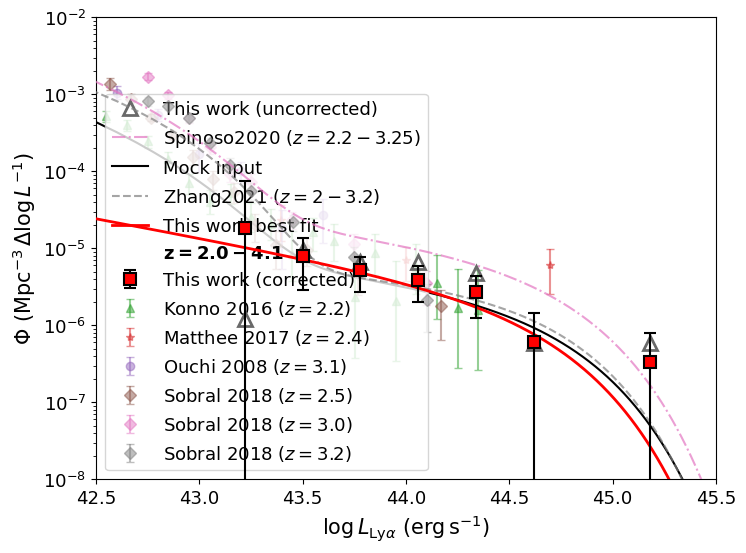

In [7]:
from my_functions import schechter

fig, ax = plt.subplots(figsize=(8, 6))

# My LF
ax.errorbar(LF_dict['LF_bins'], LF_dict['LF_total'],
            yerr=LF_dict['LF_total_err'][:2],
            # xerr=bin_width*0.5,
            linestyle='', fmt='s',
            ecolor='k', markeredgecolor='k', markerfacecolor='red',
            markeredgewidth=1.5, markersize=8,
            capsize=4, label='This work (corrected)', zorder=99)

# My uncorr LF
ax.plot(LF_dict['LF_bins'], LF_dict['LF_total_uncorr'],
        marker='^', markerfacecolor='none', markeredgecolor='dimgray',
        markeredgewidth=2, markersize=10, ls='', label='This work (uncorrected)',
        zorder=98)

# Other LFs
# for i, lf in enumerate([k16, m17b, u08, s18a, s18b, s18c]):
#     ax.errorbar(lf['logL'], lf['Phi'],
#                 yerr=[lf['yerr_minus'], lf['yerr_plus']],
#                 linestyle='', fmt=lf['fmt'], alpha=0.5,
#                 label=lf['label'], capsize=3, zorder=i)

# Plot the reference LF curves
Lx = np.linspace(10 ** 42, 10 ** 46, 10000)
phistar1 = 3.33e-6
Lstar1 = 44.65
alpha1 = -1.35

phistar2 = -3.45
Lstar2 = 42.93
alpha2 = -1.93

Phi_center = double_schechter(
    Lx, phistar1, 10 ** Lstar1, alpha1, 10 ** phistar2, 10 ** Lstar2, alpha2
) * Lx * np.log(10)

ax.plot(
    np.log10(Lx), Phi_center, ls='-.', alpha=0.7,
    label='Spinoso2020 ($z=2.2-3.25$)', zorder=51,
    color='C6'
)

ax.plot(np.log10(Lx), Phi_center * qso_factor, c='k', label='Mock Input')

phistar1 = 10 ** -3.41
Lstar1 = 10 ** 42.87
alpha1 = -1.7

phistar2 = 10 ** -5.85
Lstar2 = 10 ** 44.6
alpha2 = -1.2

Phi_center = double_schechter(
    Lx, phistar1, Lstar1, alpha1, phistar2, Lstar2, alpha2
) * Lx * np.log(10)

ax.plot(
    np.log10(Lx), Phi_center, ls='--', alpha=0.7,
    label='Zhang2021 ($z=2-3.2$)', zorder=50,
    color='C7'
)

# My fit
Lstar_fit = 44.61
Phistar_fit = -6.03
alpha = -1.5
Lx = np.logspace(41, 47, 10000)
Phi_center = schechter(Lx, 10**Phistar_fit, 10**Lstar_fit, alpha) * Lx * np.log(10)
ax.plot(np.log10(Lx), Phi_center, zorder=98, c='r',
        linewidth=2, label='This work best fit')

# Dummy to add text to legend
ax.plot([], [], ls='', label=r'$\bf{z = 2.0-4.1}$')

ax.set_ylim(1e-8, 1e-2)
ax.set_xlim(42.5, 45.5)
ax.set_yscale('log')

ax.set_xlabel(r'$\log L_{\mathrm{Ly}\alpha}$ (erg$\,$s$^{-1}$)', fontsize=15)
ax.set_ylabel(r'$\Phi$ (Mpc$^{-3}\,\Delta\logL^{-1}$)', fontsize=15)

# handles, labels = ax.get_legend_handles_labels()
# order = np.array([3, 0, 4, 5, 6, 7, 8, 9, 1, 2])
# ax.legend(np.array(handles, dtype=object)[order], np.array(
#     labels, dtype=object)[order], fontsize=9)
ax.legend()

# handles, labels = ax.get_legend_handles_labels()
# order = np.array([4, 0, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1, 2])
# ax.legend(np.array(handles, dtype=object)[order], np.array(
#     labels, dtype=object)[order], fontsize=8, ncol=2)

fig.savefig('figures/Combined_LF.pdf', bbox_inches='tight', facecolor='w')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Luminosity_functions/LF_r17-24_nb4-8_ew30_ewoth400_nb/LFs.pkl'

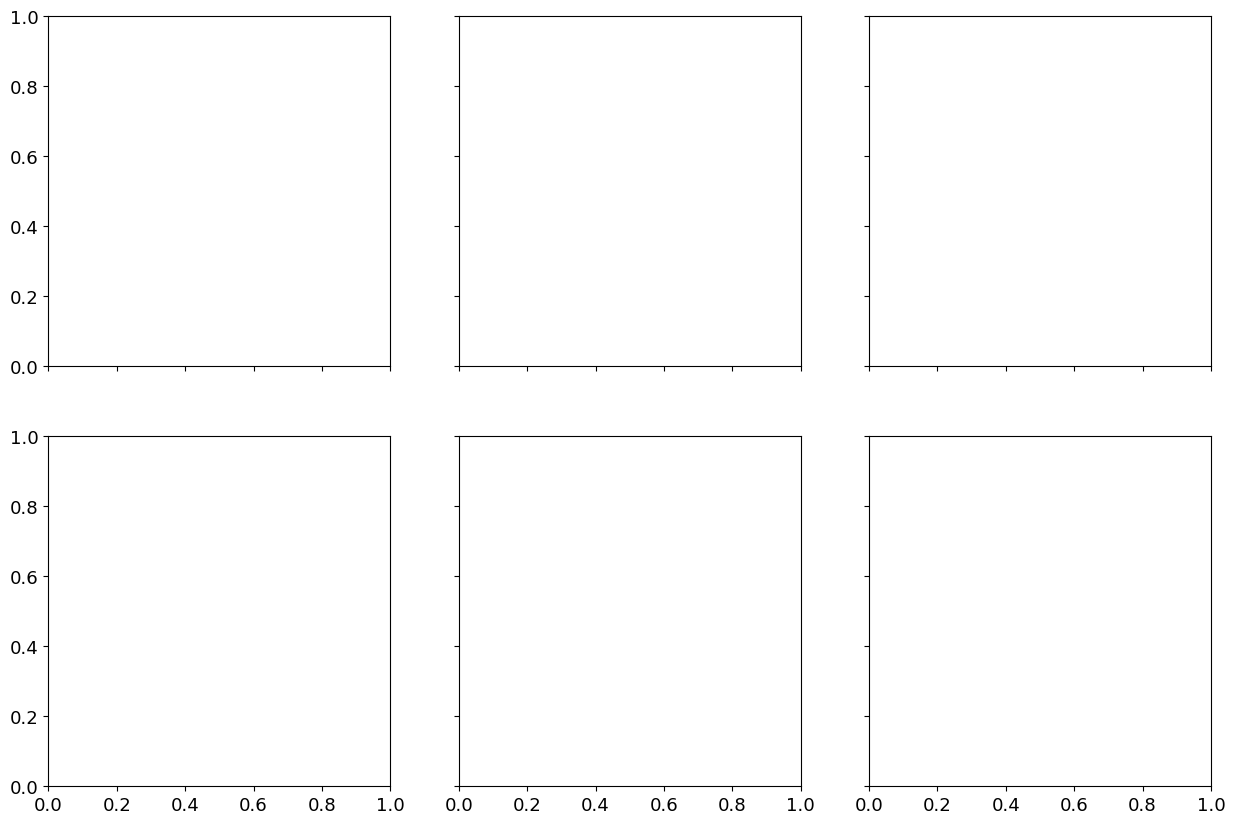

In [6]:
from my_functions import central_wavelength, nb_fwhm, schechter


fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

w_central = central_wavelength()
nb_fwhm_Arr = nb_fwhm(np.arange(60))
w_lya = 1215.67

# My fit
Lstar_fit = 44.61
Phistar_fit = -6.03
alpha = -1.5
Phi_center = schechter(Lx, 10**Phistar_fit, 10**Lstar_fit, alpha) * Lx * np.log(10)

reference_LFs = [
    [s17, m17b, k16, ds20_z225, ds20_z237],
    [s18a, m17b, b11, ds20_z237, ds20_z237],
    [s18b, u08, b11, ds20_z324],
    [s18c, s18b, u08, b11, ds20_z324],
    [b11, u08, s18b, s18c],
    [b11]
]

for i, ax in enumerate(axes.flatten()):
    [nb1, nb2] = nbs_list[i]
    
    z_min = (w_central[nb1] - nb_fwhm_Arr[nb1] * 0.5) / w_lya - 1
    z_max = (w_central[nb2] + nb_fwhm_Arr[nb2] * 0.5) / w_lya - 1

    pathname = f'Luminosity_functions/LF_r17-24_nb{nb1}-{nb2}_ew30_ewoth400_nb'
    filename = f'{pathname}/LFs.pkl'
    with open(filename, 'rb') as file:
        this_LF_dict = pickle.load(file)

    this_volume = effective_volume(nb1, nb2, 'both')

    LF_bins = this_LF_dict['LF_bins']
    bin_width = np.diff(LF_bins)[0]

    this_LF_raw = this_LF_dict['LF_total'] * this_volume * bin_width
    LF_raw = this_LF_raw / bin_width
    LF_uncorr = this_LF_dict['LF_total_raw'] * this_volume

    LF_err = ((np.array(this_LF_dict['LF_total_err']) *
                this_volume * bin_width) ** 2 - this_LF_raw) ** 0.5

    ax.text(42.6, 3e-3, fr'$\bf z={z_min:0.1f}-{z_max:0.1f}$')
    
    ax.errorbar(this_LF_dict['LF_bins'], this_LF_dict['LF_total'],
            yerr=this_LF_dict['LF_total_err'][:2],
            # xerr=bin_width*0.5,
            linestyle='', fmt='s',
            ecolor='k', markeredgecolor='k', markerfacecolor='red',
            markeredgewidth=1, markersize=8,
            capsize=4, label='This work', zorder=99)
    ax.plot(np.log10(Lx), Phi_center, c='r', zorder=0, label='Schechter fit ($z=2-4$)')

    for j, lf in enumerate(reference_LFs[i]):
        ax.errorbar(lf['logL'], lf['Phi'],
                    yerr=[lf['yerr_minus'], lf['yerr_plus']],
                    linestyle='', fmt=lf['fmt'], alpha=0.5,
                    label=lf['label'], capsize=3, zorder=j)

    if i > 2:
        ax.set_xlabel(r'$\log L_{\mathrm{Ly}\alpha}$ (erg$\,$s$^{-1}$)', fontsize=15)
    if i == 0 or i == 3:
        ax.set_ylabel(r'$\Phi$ (Mpc$^{-3}\,\Delta\logL^{-1}$)', fontsize=15)

    ax.set_ylim(1e-8, 1e-2)
    ax.set_xlim(42.5, 45.5)
    ax.set_yscale('log')

    ax.legend(fontsize=10, loc=0)

fig.tight_layout()
fig.savefig('figures/Multi_LF.pdf', bbox_inches='tight', facecolor='w')
plt.show()